# Need to get:
* boxplot comparison for machine learning efficacy for CHF, and COPD_severe
* do the KS Test and CS Test for singel GPU and distributed by 15000, 20000, and 25000 epochs

In [22]:
from sdv.evaluation import evaluate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import time
from sdv.evaluation import evaluate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier, MulticlassMLPClassifier
from sklearn.model_selection import train_test_split

# do not show warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [18]:
os.getcwd()

'c:\\Users\\dianam\\Documents\\jlab_datascience\\PlayGround\\DS6050\\eICU_gan\\data_evaluation'

In [20]:
# get the various datasets - DISTRIBUTED
df_truth = pd.read_csv('../dist_output/disc_discharge_data_15000.csv').query('data == "Truth"')
# drop the data column
df_truth = df_truth.drop(columns=['data'])
print(df_truth.shape)

df_dist_15000_GAN = pd.read_csv('../dist_output/disc_discharge_data_15000.csv').query('data == "GAN"')
df_dist_15000_GAN = df_dist_15000_GAN.drop(columns=['data'])
print(df_dist_15000_GAN.shape)

df_dist_15000_500_GAN = pd.read_csv('../dist_output/disc_discharge_data_15000_500samples.csv').query('data == "GAN"')
df_dist_15000_500_GAN = df_dist_15000_500_GAN.drop(columns=['data'])
print(df_dist_15000_500_GAN.shape)


df_dist_20000_GAN = pd.read_csv('../dist_output/disc_discharge_data_20000.csv').query('data == "GAN"')
df_dist_20000_GAN = df_dist_20000_GAN.drop(columns=['data'])
print(df_dist_20000_GAN.shape)

df_dist_20000_500_GAN = pd.read_csv('../dist_output/disc_discharge_data_20000_500samples.csv').query('data == "GAN"')
df_dist_20000_500_GAN = df_dist_20000_500_GAN.drop(columns=['data'])
print(df_dist_20000_500_GAN.shape)

df_dist_25000_GAN = pd.read_csv('../dist_output/disc_discharge_data_25000.csv').query('data == "GAN"')
df_dist_25000_GAN = df_dist_25000_GAN.drop(columns=['data'])
print(df_dist_25000_GAN.shape)

df_dist_25000_500_GAN = pd.read_csv('../dist_output/disc_discharge_data_25000_500samples.csv').query('data == "GAN"')
df_dist_25000_500_GAN = df_dist_25000_500_GAN.drop(columns=['data'])
print(df_dist_25000_500_GAN.shape)

(2027, 14)
(2027, 14)
(249000, 14)
(2027, 14)
(249000, 14)
(2027, 14)
(249000, 14)


In [21]:
# get the various datasets - SINGLE GPU
# drop the data column

df_single_15000_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_15000.csv').query('data == "GAN"')
df_single_15000_GAN = df_single_15000_GAN.drop(columns=['data'])
print(df_single_15000_GAN.shape)

df_single_15000_500_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_15000_500samples.csv').query('data == "GAN"')
df_single_15000_500_GAN = df_single_15000_500_GAN.drop(columns=['data'])
print(df_single_15000_500_GAN.shape)

df_single_20000_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_20000.csv').query('data == "GAN"')
df_single_20000_GAN = df_single_20000_GAN.drop(columns=['data'])
print(df_single_20000_GAN.shape)

df_single_20000_500_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_20000_500samples.csv').query('data == "GAN"')
df_single_20000_500_GAN = df_single_20000_500_GAN.drop(columns=['data'])
print(df_single_20000_500_GAN.shape)

df_single_25000_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_25000.csv').query('data == "GAN"')
df_single_25000_GAN = df_single_25000_GAN.drop(columns=['data'])
print(df_single_25000_GAN.shape)

df_single_25000_500_GAN = pd.read_csv('../non_dist_output/gen_discharge_data_25000_500samples.csv').query('data == "GAN"')
df_single_25000_500_GAN = df_single_25000_500_GAN.drop(columns=['data'])
print(df_single_25000_500_GAN.shape)


(2027, 14)
(249000, 14)
(2027, 14)
(249000, 14)
(2027, 14)
(249000, 14)


In [10]:
df_single_25000_500_GAN.head()

,hospitaldischargeoffset,CHF,COPD_moderate,COPD_nolimitations,COPD_severe,NoHealthProblems,asthma,homeoxygen,hypertensionrequiringtreatment,restrictivepulmonarydisease,All,ethnicity,gender,dischargestatus
2027,63243.308500,0,0,0,0,0,0,0,0,0,1,AfricanAmerican,Female,Alive
2028,15978.917620,0,0,0,0,0,0,0,0,0,1,AfricanAmerican,Female,Alive
2029,5701.100992,0,0,0,0,0,0,0,0,0,1,AfricanAmerican,Female,Alive
2030,26067.379170,0,0,0,0,0,0,0,0,0,1,AfricanAmerican,Female,Alive
2031,32307.019530,0,0,0,0,0,0,0,0,0,1,AfricanAmerican,Female,Alive


In [11]:
discrete_columns = [
    'CHF', 'COPD_moderate',
       'COPD_nolimitations', 'COPD_severe', 'NoHealthProblems', 'asthma',
       'homeoxygen', 'hypertensionrequiringtreatment',
       'restrictivepulmonarydisease', 'All', 'ethnicity', 'gender',
       'dischargestatus'
]

In [34]:
df_CTGAN_eval = pd.DataFrame(columns=['epochs', 'time', 'distributed', 'num_generated_samples', 
'CSTest_Value_ours_v_real', 'KSTest_Value_ours_v_real', 'CSTest_Value_real_train_test', 'KSTest_Value_real_train_test',
'COPD_severe_MulticlassDecisionTreeClassifier', 'COPD_severe_MulticlassMLPClassifier', 
'CHF_MulticlassDecisionTreeClassifier', 'CHF_MulticlassMLPClassifier', 
'NoHealthProblems_MulticlassDecisionTreeClassifier', 'NoHealthProblems_MulticlassMLPClassifier', 
'dischargestatus_MulticlassDecisionTreeClassifier', 'dischargestatus_MulticlassMLPClassifier',
'realsplit_COPD_severe_MulticlassDecisionTreeClassifier', 'realsplit_COPD_severe_MulticlassMLPClassifier',
'realsplit_CHF_MulticlassDecisionTreeClassifier', 'realsplit_CHF_MulticlassMLPClassifier', 
'realsplit_dischargestatus_MulticlassDecisionTreeClassifier', 'realsplit_dischargestatus_MulticlassMLPClassifier',
'realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier', 'realsplit_NoHealthProblems_MulticlassMLPClassifier'
])

# save the evaluation dataframe to a csv file
# LEAVE THIS COMMENTED OUT UNLESS YOU WANT TO OVERWRITE df_CTGAN_eval.to_csv('CTGAN_eval.csv', index=False)

#df_CTGAN_eval.head()

# load the evaluation dataframe from the csv file
df_CTGAN_eval = pd.read_csv('CTGAN_eval.csv')
print(df_CTGAN_eval.shape)
df_CTGAN_eval

(12, 24)


,epochs,time,distributed,num_generated_samples,CSTest_Value_ours_v_real,KSTest_Value_ours_v_real,CSTest_Value_real_train_test,KSTest_Value_real_train_test,COPD_severe_MulticlassDecisionTreeClassifier,COPD_severe_MulticlassMLPClassifier,...,dischargestatus_MulticlassDecisionTreeClassifier,dischargestatus_MulticlassMLPClassifier,realsplit_COPD_severe_MulticlassDecisionTreeClassifier,realsplit_COPD_severe_MulticlassMLPClassifier,realsplit_CHF_MulticlassDecisionTreeClassifier,realsplit_CHF_MulticlassMLPClassifier,realsplit_dischargestatus_MulticlassDecisionTreeClassifier,realsplit_dischargestatus_MulticlassMLPClassifier,realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier,realsplit_NoHealthProblems_MulticlassMLPClassifier
0,15000,-1,False,2027,1.000000,0.993273,0.960192,0.988286,0.661458,0.742671,...,0.542157,0.475278,0.645724,0.662332,0.634017,0.565737,0.975599,0.958192,0.508700,0.46789
1,20000,-1,False,2027,1.000000,0.992241,0.960192,0.988286,0.698260,0.742671,...,0.544372,0.475278,0.641640,0.662332,0.596685,0.565737,0.975599,0.949114,0.508700,0.46789
2,25000,-1,False,2027,1.000000,0.993587,0.960192,0.988286,0.665532,0.746502,...,0.512715,0.475278,0.645724,0.662332,0.631426,0.552209,0.975599,0.958192,0.514686,0.46789
3,15000,-1,False,249000,0.914923,0.907979,0.960192,0.988286,0.567252,0.608397,...,0.463589,0.546677,0.641640,0.662332,0.566660,0.563441,0.975599,0.958192,0.508700,0.46789
4,20000,-1,False,249000,0.914923,0.912004,0.960192,0.988286,0.567003,0.586015,...,0.499255,0.493801,0.645724,0.662332,0.597440,0.565737,0.975599,0.939772,0.492793,0.46789
5,25000,-1,False,249000,0.914923,0.911427,0.960192,0.988286,0.581472,0.621692,...,0.494986,0.510015,0.645724,0.662332,0.585580,0.565737,0.975599,0.958192,0.510172,0.46789
6,15000,-1,True,2027,1.000000,0.995067,0.960192,0.988286,0.709316,0.748456,...,0.521575,0.475278,0.645724,0.662332,0.633596,0.558991,0.975599,0.958192,0.495421,0.46789
7,20000,-1,True,2027,1.000000,0.996591,0.960192,0.988286,0.696387,0.746502,...,0.560697,0.475278,0.645724,0.662332,0.600763,0.563441,0.975599,0.958192,0.507242,0.46789
8,25000,-1,True,2027,1.000000,0.996457,0.960192,0.988286,0.654668,0.718498,...,0.551882,0.475278,0.645724,0.662332,0.608575,0.565737,0.975599,0.958192,0.496752,0.46789
9,15000,-1,True,249000,0.914923,0.911807,0.960192,0.988286,0.569926,0.653228,...,0.461615,0.477492,0.641640,0.662332,0.567927,0.563441,0.975599,0.958192,0.510172,0.46789


In [31]:
lst_epochs = [15000, 20000, 25000, 15000, 20000, 25000,]
lst_num_generated_samples = [2027, 2027, 2027, 249000, 249000, 249000]
lst_dfs = [df_single_15000_GAN, df_single_20000_GAN, df_single_25000_GAN, df_single_15000_500_GAN, df_single_20000_500_GAN, df_single_25000_500_GAN]

# get the train test split of the truth data
df_train, df_test = train_test_split(df_truth, test_size=0.2, random_state=314)

for i in range(0,6):
    # run the various tests
    samples = lst_dfs[i].copy()
    e = lst_epochs[i]
    ns = lst_num_generated_samples[i]
    total_time = -1
    dis = False


    print(" ")
    print("Individual evaluation scores for real data train / test split: ")
    df_eval_real = evaluate(df_test, df_train, metrics=['CSTest', 'KSTest'], aggregate=False)
    real_CSTest_score = df_eval_real.query('metric == "CSTest"')['normalized_score'].values[0]
    real_KSTest_score = df_eval_real.query('metric == "KSTest"')['normalized_score'].values[0]
    print("real CSTest score: ", real_CSTest_score)
    print("real KSTest score: ", real_KSTest_score)

    print(" ")
    print("Individual evaluation scores for real data and CTGAN data: ")
    df_eval_ctgan = evaluate(df_truth, samples, metrics=['CSTest', 'KSTest'], aggregate=False)

    ctgan_CSTest_score = df_eval_ctgan.query('metric == "CSTest"')['normalized_score'].values[0]
    ctgan_KSTest_score = df_eval_ctgan.query('metric == "KSTest"')['normalized_score'].values[0]

    print("CTGAN CSTest score: ", ctgan_CSTest_score)
    print("CTGAN KSTest score: ", ctgan_KSTest_score)

    # COPD severe evaluation
    treeclassifier_COPDsevere_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='COPD_severe')
    mlpclassifier_COPDsevere_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='COPD_severe')
    treeclassifier_COPDsevere_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='COPD_severe')
    mlpclassifier_COPDsevere_real = MulticlassMLPClassifier.compute(df_test, df_train, target='COPD_severe')

    #CHF evaluation
    treeclassifier_CHF_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='CHF')
    mlpclassifier_CHF_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='CHF')
    treeclassifier_CHF_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='CHF')
    mlpclassifier_CHF_real = MulticlassMLPClassifier.compute(df_test, df_train, target='CHF')

    # dischargestatus evaluation
    treeclassifier_dischargestatus_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='dischargestatus')
    mlpclassifier_dischargestatus_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='dischargestatus')
    treeclassifier_dischargestatus_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='dischargestatus')
    mlpclassifier_dischargestatus_real = MulticlassMLPClassifier.compute(df_test, df_train, target='dischargestatus')

    # NoHealthProblems evaluation
    treeclassifier_NoHealthProblems_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='NoHealthProblems')
    mlpclassifier_NoHealthProblems_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='NoHealthProblems')
    treeclassifier_NoHealthProblems_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='NoHealthProblems')
    mlpclassifier_NoHealthProblems_real = MulticlassMLPClassifier.compute(df_test, df_train, target='NoHealthProblems')

    df_CTGAN_eval.loc[len(df_CTGAN_eval.index)] = [e, total_time, dis,
    ns, ctgan_CSTest_score, 
    ctgan_KSTest_score, real_CSTest_score, 
    real_KSTest_score, 
    treeclassifier_COPDsevere_ctgan, 
    mlpclassifier_COPDsevere_ctgan, 
    treeclassifier_CHF_ctgan, mlpclassifier_CHF_ctgan,
    treeclassifier_NoHealthProblems_ctgan, 
    mlpclassifier_NoHealthProblems_ctgan,
    treeclassifier_dischargestatus_ctgan, 
    mlpclassifier_dischargestatus_ctgan,
    treeclassifier_COPDsevere_real, 
    mlpclassifier_COPDsevere_real, 
    treeclassifier_CHF_ctgan, mlpclassifier_CHF_real,
    treeclassifier_NoHealthProblems_real, 
    mlpclassifier_NoHealthProblems_real,
    treeclassifier_dischargestatus_real, 
    mlpclassifier_dischargestatus_real]


df_CTGAN_eval.to_csv('CTGAN_eval.csv', index=False)
df_CTGAN_eval.head()

 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9932726375745616
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9922411086693277
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9935865811544153
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data an

,epochs,time,distributed,num_generated_samples,CSTest_Value_ours_v_real,KSTest_Value_ours_v_real,CSTest_Value_real_train_test,KSTest_Value_real_train_test,COPD_severe_MulticlassDecisionTreeClassifier,COPD_severe_MulticlassMLPClassifier,...,dischargestatus_MulticlassDecisionTreeClassifier,dischargestatus_MulticlassMLPClassifier,realsplit_COPD_severe_MulticlassDecisionTreeClassifier,realsplit_COPD_severe_MulticlassMLPClassifier,realsplit_CHF_MulticlassDecisionTreeClassifier,realsplit_CHF_MulticlassMLPClassifier,realsplit_dischargestatus_MulticlassDecisionTreeClassifier,realsplit_dischargestatus_MulticlassMLPClassifier,realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier,realsplit_NoHealthProblems_MulticlassMLPClassifier
0,15000,-1,False,2027,1.000000,0.993273,0.960192,0.988286,0.661458,0.742671,...,0.542157,0.475278,0.645724,0.662332,0.634017,0.565737,0.975599,0.958192,0.508700,0.46789
1,20000,-1,False,2027,1.000000,0.992241,0.960192,0.988286,0.698260,0.742671,...,0.544372,0.475278,0.641640,0.662332,0.596685,0.565737,0.975599,0.949114,0.508700,0.46789
2,25000,-1,False,2027,1.000000,0.993587,0.960192,0.988286,0.665532,0.746502,...,0.512715,0.475278,0.645724,0.662332,0.631426,0.552209,0.975599,0.958192,0.514686,0.46789
3,15000,-1,False,249000,0.914923,0.907979,0.960192,0.988286,0.567252,0.608397,...,0.463589,0.546677,0.641640,0.662332,0.566660,0.563441,0.975599,0.958192,0.508700,0.46789
4,20000,-1,False,249000,0.914923,0.912004,0.960192,0.988286,0.567003,0.586015,...,0.499255,0.493801,0.645724,0.662332,0.597440,0.565737,0.975599,0.939772,0.492793,0.46789


In [33]:
lst_epochs = [15000, 20000, 25000, 15000, 20000, 25000,]
lst_num_generated_samples = [2027, 2027, 2027, 249000, 249000, 249000]
lst_dfs = [df_dist_15000_GAN, df_dist_20000_GAN, df_dist_25000_GAN, df_dist_15000_500_GAN, df_dist_20000_500_GAN, df_dist_25000_500_GAN]

# get the train test split of the truth data
df_train, df_test = train_test_split(df_truth, test_size=0.2, random_state=314)

for i in range(0,6):
    # run the various tests
    samples = lst_dfs[i].copy()
    e = lst_epochs[i]
    ns = lst_num_generated_samples[i]
    total_time = -1
    dis = True


    print(" ")
    print("Individual evaluation scores for real data train / test split: ")
    df_eval_real = evaluate(df_test, df_train, metrics=['CSTest', 'KSTest'], aggregate=False)
    real_CSTest_score = df_eval_real.query('metric == "CSTest"')['normalized_score'].values[0]
    real_KSTest_score = df_eval_real.query('metric == "KSTest"')['normalized_score'].values[0]
    print("real CSTest score: ", real_CSTest_score)
    print("real KSTest score: ", real_KSTest_score)

    print(" ")
    print("Individual evaluation scores for real data and CTGAN data: ")
    df_eval_ctgan = evaluate(df_truth, samples, metrics=['CSTest', 'KSTest'], aggregate=False)

    ctgan_CSTest_score = df_eval_ctgan.query('metric == "CSTest"')['normalized_score'].values[0]
    ctgan_KSTest_score = df_eval_ctgan.query('metric == "KSTest"')['normalized_score'].values[0]

    print("CTGAN CSTest score: ", ctgan_CSTest_score)
    print("CTGAN KSTest score: ", ctgan_KSTest_score)

    # COPD severe evaluation
    treeclassifier_COPDsevere_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='COPD_severe')
    mlpclassifier_COPDsevere_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='COPD_severe')
    treeclassifier_COPDsevere_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='COPD_severe')
    mlpclassifier_COPDsevere_real = MulticlassMLPClassifier.compute(df_test, df_train, target='COPD_severe')

    #CHF evaluation
    treeclassifier_CHF_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='CHF')
    mlpclassifier_CHF_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='CHF')
    treeclassifier_CHF_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='CHF')
    mlpclassifier_CHF_real = MulticlassMLPClassifier.compute(df_test, df_train, target='CHF')

    # dischargestatus evaluation
    treeclassifier_dischargestatus_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='dischargestatus')
    mlpclassifier_dischargestatus_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='dischargestatus')
    treeclassifier_dischargestatus_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='dischargestatus')
    mlpclassifier_dischargestatus_real = MulticlassMLPClassifier.compute(df_test, df_train, target='dischargestatus')

    # NoHealthProblems evaluation
    treeclassifier_NoHealthProblems_ctgan = MulticlassDecisionTreeClassifier.compute(df_truth, samples, target='NoHealthProblems')
    mlpclassifier_NoHealthProblems_ctgan = MulticlassMLPClassifier.compute(df_truth, samples, target='NoHealthProblems')
    treeclassifier_NoHealthProblems_real = MulticlassDecisionTreeClassifier.compute(df_test, df_train, target='NoHealthProblems')
    mlpclassifier_NoHealthProblems_real = MulticlassMLPClassifier.compute(df_test, df_train, target='NoHealthProblems')

    df_CTGAN_eval.loc[len(df_CTGAN_eval.index)] = [e, total_time, dis,
    ns, ctgan_CSTest_score, 
    ctgan_KSTest_score, real_CSTest_score, 
    real_KSTest_score, 
    treeclassifier_COPDsevere_ctgan, 
    mlpclassifier_COPDsevere_ctgan, 
    treeclassifier_CHF_ctgan, mlpclassifier_CHF_ctgan,
    treeclassifier_NoHealthProblems_ctgan, 
    mlpclassifier_NoHealthProblems_ctgan,
    treeclassifier_dischargestatus_ctgan, 
    mlpclassifier_dischargestatus_ctgan,
    treeclassifier_COPDsevere_real, 
    mlpclassifier_COPDsevere_real, 
    treeclassifier_CHF_ctgan, mlpclassifier_CHF_real,
    treeclassifier_NoHealthProblems_real, 
    mlpclassifier_NoHealthProblems_real,
    treeclassifier_dischargestatus_real, 
    mlpclassifier_dischargestatus_real]


df_CTGAN_eval.to_csv('CTGAN_eval.csv', index=False)
df_CTGAN_eval.head()

 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9950666008880119
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9965914697044446
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data and CTGAN data: 
CTGAN CSTest score:  1.0
CTGAN KSTest score:  0.9964569224559358
 
Individual evaluation scores for real data train / test split: 
real CSTest score:  0.9601924543019867
real KSTest score:  0.988286161284949
 
Individual evaluation scores for real data an

,epochs,time,distributed,num_generated_samples,CSTest_Value_ours_v_real,KSTest_Value_ours_v_real,CSTest_Value_real_train_test,KSTest_Value_real_train_test,COPD_severe_MulticlassDecisionTreeClassifier,COPD_severe_MulticlassMLPClassifier,...,dischargestatus_MulticlassDecisionTreeClassifier,dischargestatus_MulticlassMLPClassifier,realsplit_COPD_severe_MulticlassDecisionTreeClassifier,realsplit_COPD_severe_MulticlassMLPClassifier,realsplit_CHF_MulticlassDecisionTreeClassifier,realsplit_CHF_MulticlassMLPClassifier,realsplit_dischargestatus_MulticlassDecisionTreeClassifier,realsplit_dischargestatus_MulticlassMLPClassifier,realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier,realsplit_NoHealthProblems_MulticlassMLPClassifier
0,15000,-1,False,2027,1.000000,0.993273,0.960192,0.988286,0.661458,0.742671,...,0.542157,0.475278,0.645724,0.662332,0.634017,0.565737,0.975599,0.958192,0.508700,0.46789
1,20000,-1,False,2027,1.000000,0.992241,0.960192,0.988286,0.698260,0.742671,...,0.544372,0.475278,0.641640,0.662332,0.596685,0.565737,0.975599,0.949114,0.508700,0.46789
2,25000,-1,False,2027,1.000000,0.993587,0.960192,0.988286,0.665532,0.746502,...,0.512715,0.475278,0.645724,0.662332,0.631426,0.552209,0.975599,0.958192,0.514686,0.46789
3,15000,-1,False,249000,0.914923,0.907979,0.960192,0.988286,0.567252,0.608397,...,0.463589,0.546677,0.641640,0.662332,0.566660,0.563441,0.975599,0.958192,0.508700,0.46789
4,20000,-1,False,249000,0.914923,0.912004,0.960192,0.988286,0.567003,0.586015,...,0.499255,0.493801,0.645724,0.662332,0.597440,0.565737,0.975599,0.939772,0.492793,0.46789


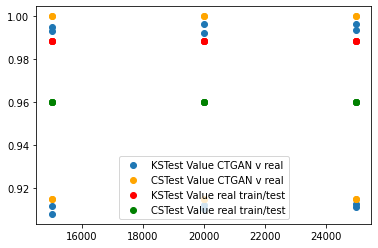

In [35]:
plt.scatter(df_CTGAN_eval['epochs'], df_CTGAN_eval['KSTest_Value_ours_v_real'], label='KSTest Value CTGAN v real')
plt.scatter(df_CTGAN_eval['epochs'], df_CTGAN_eval['CSTest_Value_ours_v_real'], c='orange', label='CSTest Value CTGAN v real')
plt.scatter(df_CTGAN_eval['epochs'], df_CTGAN_eval['KSTest_Value_real_train_test'], c='red', label='KSTest Value real train/test')
plt.scatter(df_CTGAN_eval['epochs'], df_CTGAN_eval['CSTest_Value_real_train_test'], c='green', label='CSTest Value real train/test')
plt.legend()

In [48]:
def plot_comparison_boxplots(df, col_prefix, feature_description):

    # boxplot for all columns
    # set the figure size
    plt.figure(figsize=(10, 4))
    df_eval = df[[col_prefix + '_MulticlassDecisionTreeClassifier','realsplit_' + col_prefix + '_MulticlassDecisionTreeClassifier', col_prefix + '_MulticlassMLPClassifier','realsplit_' + col_prefix + '_MulticlassMLPClassifier']]
    sns.boxplot(data=df_eval, palette="Set1")

    # set the x axis label text
    plt.xlabel('Classifier', fontdict={'fontsize': 14})
    # set the x axis tick labels
    plt.xticks(np.arange(0, 4), ('discGAN DT', 'Real Data DT', 'discGAN MLP', 'Real Data MLP'))
    # set font size of x tick labels
    plt.setp(plt.gca().get_xticklabels(), fontsize=12)

    plt.ylabel('Classifier Accuracy', fontdict={'fontsize': 14})

    plt.title('Compare discGAN and real train/test: machine learning efficacy for ' + feature_description + ' classification', fontdict={'fontsize': 12
    })
    # save the plot to a file
    plt.savefig('figs/discGAN_' + col_prefix + '_boxplot.png')

    plt.show()

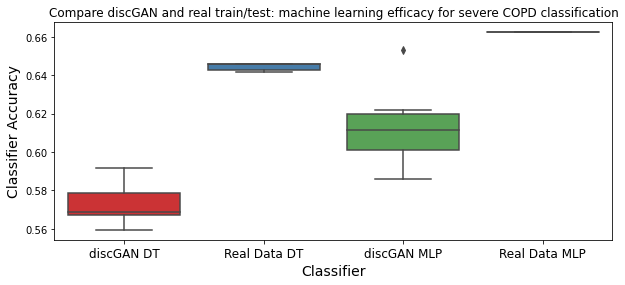

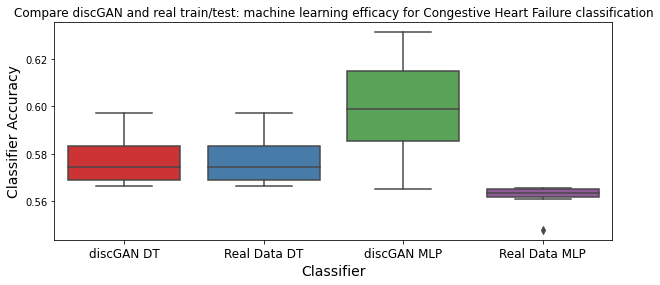

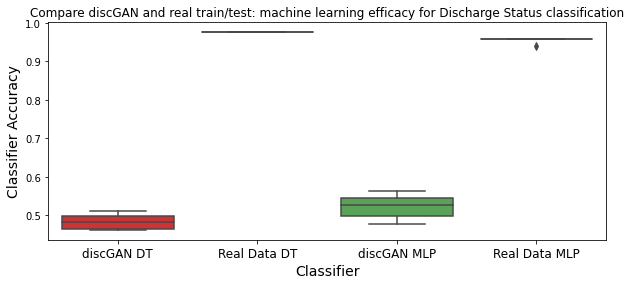

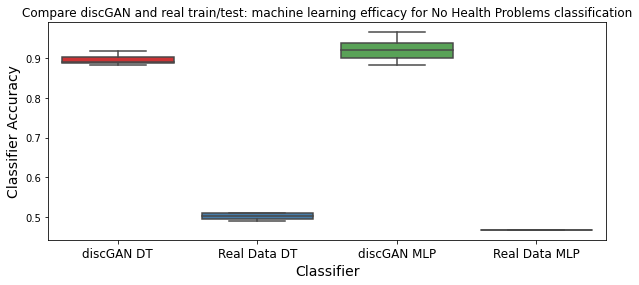

In [49]:
plot_comparison_boxplots(df_CTGAN_eval.query('num_generated_samples == 249000 and epochs > 9000'), 'COPD_severe', 'severe COPD')
plot_comparison_boxplots(df_CTGAN_eval.query('num_generated_samples == 249000 and epochs > 9000'), 'CHF', 'Congestive Heart Failure')
plot_comparison_boxplots(df_CTGAN_eval.query('num_generated_samples == 249000 and epochs > 9000'), 'dischargestatus', 'Discharge Status')
plot_comparison_boxplots(df_CTGAN_eval.query('num_generated_samples == 249000 and epochs > 9000'), 'NoHealthProblems', 'No Health Problems')

In [56]:
def plot_value_by_epochs(df, num_samples_gen, test_column, test_description):

    # set the figure size
    plt.figure(figsize=(10, 4))
    df_eval = df.query('num_generated_samples == ' + num_samples_gen)
    sns.scatterplot(data=df_eval, x='epochs', hue='distributed', y=test_column, palette="Set1")
    sns.lineplot(data=df_eval, x='epochs', hue='distributed', y=test_column, palette="Set1")
    # set x axis ticks
    plt.xticks([15000,20000,25000])

    # plot a dotted horizontal line at y = 0.95
    plt.axhline(y=0.95, color='k', linestyle='--', linewidth=1, label='95%')

    # set the x axis label text
    plt.xlabel('Epochs', fontdict={'fontsize': 14})

    plt.ylabel(test_description, fontdict={'fontsize': 14})

    plt.title(test_description + ' discGAN to real data by epochs', fontdict={'fontsize': 14})
    #plt.legend()
    # save the plot to a file
    plt.savefig('figs/discGAN_' + test_column + '_' + str(num_samples_gen) + '_byepoch.png')

    plt.show()

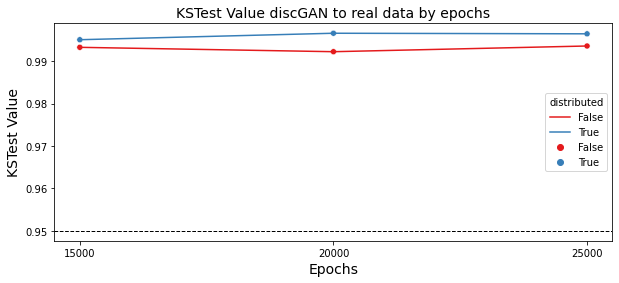

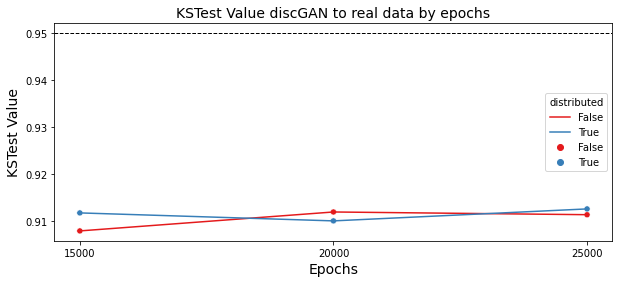

In [58]:
plot_value_by_epochs(df_CTGAN_eval, '2027', 'KSTest_Value_ours_v_real', 'KSTest Value')
plot_value_by_epochs(df_CTGAN_eval, '249000', 'KSTest_Value_ours_v_real', 'KSTest Value')

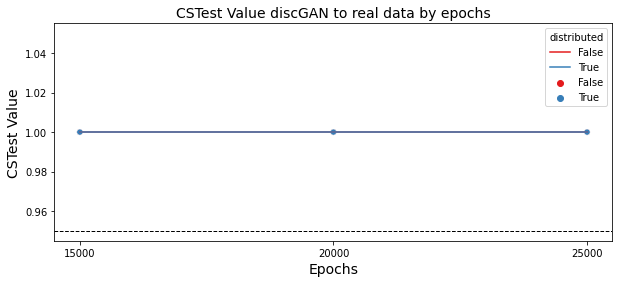

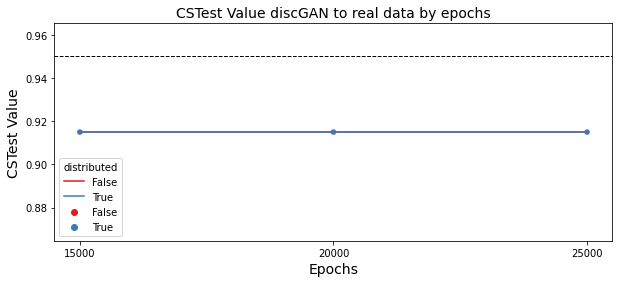

In [59]:
plot_value_by_epochs(df_CTGAN_eval, '2027', 'CSTest_Value_ours_v_real', 'CSTest Value')
plot_value_by_epochs(df_CTGAN_eval, '249000', 'CSTest_Value_ours_v_real', 'CSTest Value')

In [67]:
df_CTGAN_eval['KSTC'] = [1 - abs(1 - (g/r)) for g,r in zip(df_CTGAN_eval['KSTest_Value_ours_v_real'], df_CTGAN_eval['KSTest_Value_real_train_test'])]
df_CTGAN_eval['CSTC'] = [1 - abs(1 - (g/r)) for g,r in zip(df_CTGAN_eval['CSTest_Value_ours_v_real'], df_CTGAN_eval['CSTest_Value_real_train_test'])]

df_CTGAN_eval.query('num_generated_samples == 249000')[['epochs','distributed','KSTC','KSTest_Value_ours_v_real','KSTest_Value_real_train_test','CSTC','CSTest_Value_ours_v_real','CSTest_Value_real_train_test']]
df_CTGAN_eval.to_csv('discGAN_eval.csv', index=False)

In [71]:
df_discGAN_eval = pd.read_csv('discGAN_eval.csv')
# no limit on number of dataframe columns displayed
pd.set_option('display.max_columns', None)
df_discGAN_eval

,epochs,time,distributed,num_generated_samples,CSTest_Value_ours_v_real,KSTest_Value_ours_v_real,CSTest_Value_real_train_test,KSTest_Value_real_train_test,COPD_severe_MulticlassDecisionTreeClassifier,COPD_severe_MulticlassMLPClassifier,CHF_MulticlassDecisionTreeClassifier,CHF_MulticlassMLPClassifier,NoHealthProblems_MulticlassDecisionTreeClassifier,NoHealthProblems_MulticlassMLPClassifier,dischargestatus_MulticlassDecisionTreeClassifier,dischargestatus_MulticlassMLPClassifier,realsplit_COPD_severe_MulticlassDecisionTreeClassifier,realsplit_COPD_severe_MulticlassMLPClassifier,realsplit_CHF_MulticlassDecisionTreeClassifier,realsplit_CHF_MulticlassMLPClassifier,realsplit_dischargestatus_MulticlassDecisionTreeClassifier,realsplit_dischargestatus_MulticlassMLPClassifier,realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier,realsplit_NoHealthProblems_MulticlassMLPClassifier,KSTC,CSTC
0,15000,-1,False,2027,1.000000,0.993273,0.960192,0.988286,0.661458,0.742671,0.634017,0.579787,0.978661,0.989083,0.542157,0.475278,0.645724,0.662332,0.634017,0.565737,0.975599,0.958192,0.508700,0.46789,0.994954,0.958542
1,20000,-1,False,2027,1.000000,0.992241,0.960192,0.988286,0.698260,0.742671,0.596685,0.600296,0.987619,0.989083,0.544372,0.475278,0.641640,0.662332,0.596685,0.565737,0.975599,0.949114,0.508700,0.46789,0.995998,0.958542
2,25000,-1,False,2027,1.000000,0.993587,0.960192,0.988286,0.665532,0.746502,0.631426,0.584546,0.970113,0.985891,0.512715,0.475278,0.645724,0.662332,0.631426,0.552209,0.975599,0.958192,0.514686,0.46789,0.994637,0.958542
3,15000,-1,False,249000,0.914923,0.907979,0.960192,0.988286,0.567252,0.608397,0.566660,0.585079,0.918125,0.914644,0.463589,0.546677,0.641640,0.662332,0.566660,0.563441,0.975599,0.958192,0.508700,0.46789,0.918741,0.952853
4,20000,-1,False,249000,0.914923,0.912004,0.960192,0.988286,0.567003,0.586015,0.597440,0.631264,0.905177,0.925771,0.499255,0.493801,0.645724,0.662332,0.597440,0.565737,0.975599,0.939772,0.492793,0.46789,0.922814,0.952853
5,25000,-1,False,249000,0.914923,0.911427,0.960192,0.988286,0.581472,0.621692,0.585580,0.565417,0.889935,0.964822,0.494986,0.510015,0.645724,0.662332,0.585580,0.565737,0.975599,0.958192,0.510172,0.46789,0.922230,0.952853
6,15000,-1,True,2027,1.000000,0.995067,0.960192,0.988286,0.709316,0.748456,0.633596,0.590426,0.978872,0.984283,0.521575,0.475278,0.645724,0.662332,0.633596,0.558991,0.975599,0.958192,0.495421,0.46789,0.993139,0.958542
7,20000,-1,True,2027,1.000000,0.996591,0.960192,0.988286,0.696387,0.746502,0.600763,0.586077,0.987619,0.987619,0.560697,0.475278,0.645724,0.662332,0.600763,0.563441,0.975599,0.958192,0.507242,0.46789,0.991596,0.958542
8,25000,-1,True,2027,1.000000,0.996457,0.960192,0.988286,0.654668,0.718498,0.608575,0.593191,0.969966,0.961058,0.551882,0.475278,0.645724,0.662332,0.608575,0.565737,0.975599,0.958192,0.496752,0.46789,0.991732,0.958542
9,15000,-1,True,249000,0.914923,0.911807,0.960192,0.988286,0.569926,0.653228,0.567927,0.611065,0.881592,0.883082,0.461615,0.477492,0.641640,0.662332,0.567927,0.563441,0.975599,0.958192,0.510172,0.46789,0.922614,0.952853


In [76]:
df_discGAN_eval['CHF_MLEC_DT'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['CHF_MulticlassDecisionTreeClassifier'], df_discGAN_eval['realsplit_CHF_MulticlassDecisionTreeClassifier'])]
df_discGAN_eval['CHF_MLEC_MLP'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['CHF_MulticlassMLPClassifier'], df_discGAN_eval['realsplit_CHF_MulticlassMLPClassifier'])]
df_discGAN_eval['COPD_severe_MLEC_DT'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['COPD_severe_MulticlassDecisionTreeClassifier'], df_discGAN_eval['realsplit_COPD_severe_MulticlassDecisionTreeClassifier'])]
df_discGAN_eval['COPD_severe_MLEC_MLP'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['COPD_severe_MulticlassMLPClassifier'], df_discGAN_eval['realsplit_COPD_severe_MulticlassMLPClassifier'])]
df_discGAN_eval['dischargestatus_severe_MLEC_DT'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['dischargestatus_MulticlassDecisionTreeClassifier'], df_discGAN_eval['realsplit_dischargestatus_MulticlassDecisionTreeClassifier'])]
df_discGAN_eval['dischargestatus_severe_MLEC_MLP'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['dischargestatus_MulticlassMLPClassifier'], df_discGAN_eval['realsplit_dischargestatus_MulticlassMLPClassifier'])]
df_discGAN_eval['NoHealthProblems_MLEC_DT'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['NoHealthProblems_MulticlassDecisionTreeClassifier'], df_discGAN_eval['realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier'])]
df_discGAN_eval['NoHealthProblems_MLEC_MLP'] = [1 - abs(1 - (g/r)) for g,r in zip(df_discGAN_eval['NoHealthProblems_MulticlassMLPClassifier'], df_discGAN_eval['realsplit_NoHealthProblems_MulticlassMLPClassifier'])]
df_discGAN_eval.to_csv('discGAN_eval.csv', index=False)
df_discGAN_eval.query('epochs==25000 and num_generated_samples == 249000')

,epochs,time,distributed,num_generated_samples,CSTest_Value_ours_v_real,KSTest_Value_ours_v_real,CSTest_Value_real_train_test,KSTest_Value_real_train_test,COPD_severe_MulticlassDecisionTreeClassifier,COPD_severe_MulticlassMLPClassifier,CHF_MulticlassDecisionTreeClassifier,CHF_MulticlassMLPClassifier,NoHealthProblems_MulticlassDecisionTreeClassifier,NoHealthProblems_MulticlassMLPClassifier,dischargestatus_MulticlassDecisionTreeClassifier,dischargestatus_MulticlassMLPClassifier,realsplit_COPD_severe_MulticlassDecisionTreeClassifier,realsplit_COPD_severe_MulticlassMLPClassifier,realsplit_CHF_MulticlassDecisionTreeClassifier,realsplit_CHF_MulticlassMLPClassifier,realsplit_dischargestatus_MulticlassDecisionTreeClassifier,realsplit_dischargestatus_MulticlassMLPClassifier,realsplit_NoHealthProblems_MulticlassDecisionTreeClassifier,realsplit_NoHealthProblems_MulticlassMLPClassifier,KSTC,CSTC,CHF_MLEC_DT,CHF_MLEC_MLP,COPD_severe_MLEC_DT,COPD_severe_MLEC_MLP,dischargestatus_severe_MLEC_DT,dischargestatus_severe_MLEC_MLP,NoHealthProblems_MLEC_DT,NoHealthProblems_MLEC_MLP
5,25000,-1,False,249000,0.914923,0.911427,0.960192,0.988286,0.581472,0.621692,0.585580,0.565417,0.889935,0.964822,0.494986,0.510015,0.645724,0.662332,0.585580,0.565737,0.975599,0.958192,0.510172,0.46789,0.922230,0.952853,1.0,0.999434,0.900496,0.938641,0.507366,0.532268,0.255619,-0.062072
11,25000,-1,True,249000,0.914923,0.912656,0.960192,0.988286,0.591514,0.598725,0.576462,0.616333,0.887825,0.893561,0.511802,0.541008,0.645724,0.662332,0.576462,0.548012,0.975599,0.958192,0.491494,0.46789,0.923473,0.952853,1.0,0.875330,0.916047,0.903966,0.524603,0.564613,0.193621,0.090233
